In [4]:
!pip install openbb[all] --quiet

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import openbb

from openbb import obb

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("🚀 Advanced OpenBB Financial Analysis Tutorial")
print("=" * 60)

🚀 Advanced OpenBB Financial Analysis Tutorial


In [5]:
print("\n📊 1. BUILDING AND ANALYZING A TECH PORTFOLIO")
print("-" * 50)

tech_stocks = ['AAPL', 'GOOGL', 'MSFT', 'TSLA', 'NVDA']
initial_weights = [0.25, 0.20, 0.25, 0.15, 0.15]

end_date = datetime.now().strftime('%Y-%m-%d')
start_date = (datetime.now() - timedelta(days=365)).strftime('%Y-%m-%d')

portfolio_data = {}
portfolio_returns = pd.DataFrame()
successful_stocks = []

print(f"Fetching data from {start_date} to {end_date}...")

for i, symbol in enumerate(tech_stocks):
    try:
        data = obb.equity.price.historical(symbol=symbol, start_date=start_date, end_date=end_date)
        df = data.to_df()

        if df.index.duplicated().any():
            df = df[~df.index.duplicated(keep='first')]

        portfolio_data[symbol] = df

        returns = df['close'].pct_change().dropna()
        portfolio_returns[symbol] = returns
        successful_stocks.append(symbol)

        print(f"✅ {symbol}: {len(df)} days of data")
    except Exception as e:
        print(f"❌ Error fetching {symbol}: {str(e)}")

if successful_stocks:
    successful_indices = [tech_stocks.index(stock) for stock in successful_stocks]
    portfolio_weights = [initial_weights[i] for i in successful_indices]
    total_weight = sum(portfolio_weights)
    portfolio_weights = [w/total_weight for w in portfolio_weights]

    print(f"\n📋 Portfolio composition (normalized weights):")
    for stock, weight in zip(successful_stocks, portfolio_weights):
        print(f"  {stock}: {weight:.1%}")
else:
    portfolio_weights = []

print("\n📈 2. PORTFOLIO PERFORMANCE ANALYSIS")
print("-" * 50)

if not portfolio_returns.empty and portfolio_weights:
    weighted_returns = (portfolio_returns * portfolio_weights).sum(axis=1)

    annual_return = weighted_returns.mean() * 252
    annual_volatility = weighted_returns.std() * np.sqrt(252)
    sharpe_ratio = annual_return / annual_volatility if annual_volatility > 0 else 0
    max_drawdown = (weighted_returns.cumsum().expanding().max() - weighted_returns.cumsum()).max()

    print(f"Portfolio Annual Return: {annual_return:.2%}")
    print(f"Portfolio Volatility: {annual_volatility:.2%}")
    print(f"Sharpe Ratio: {sharpe_ratio:.3f}")
    print(f"Max Drawdown: {max_drawdown:.2%}")

    print("\n📊 Individual Stock Performance:")
    for stock in successful_stocks:
        stock_return = portfolio_returns[stock].mean() * 252
        stock_vol = portfolio_returns[stock].std() * np.sqrt(252)
        print(f"{stock}: Return {stock_return:.2%}, Volatility {stock_vol:.2%}")
else:
    print("❌ No valid portfolio data available for analysis")


📊 1. BUILDING AND ANALYZING A TECH PORTFOLIO
--------------------------------------------------
Fetching data from 2024-08-10 to 2025-08-10...
✅ AAPL: 249 days of data
✅ GOOGL: 249 days of data
✅ MSFT: 249 days of data
✅ TSLA: 249 days of data
✅ NVDA: 249 days of data

📋 Portfolio composition (normalized weights):
  AAPL: 25.0%
  GOOGL: 20.0%
  MSFT: 25.0%
  TSLA: 15.0%
  NVDA: 15.0%

📈 2. PORTFOLIO PERFORMANCE ANALYSIS
--------------------------------------------------
Portfolio Annual Return: 34.56%
Portfolio Volatility: 30.55%
Sharpe Ratio: 1.131
Max Drawdown: 35.09%

📊 Individual Stock Performance:
AAPL: Return 6.17%, Volatility 31.90%
GOOGL: Return 24.30%, Volatility 31.19%
MSFT: Return 28.20%, Volatility 24.99%
TSLA: Return 75.27%, Volatility 72.19%
NVDA: Return 65.45%, Volatility 52.91%


In [6]:
print("\n🔍 3. ADVANCED TECHNICAL ANALYSIS")
print("-" * 50)

symbol = 'NVDA'
try:
    price_data = obb.equity.price.historical(symbol=symbol, start_date=start_date, end_date=end_date)
    df = price_data.to_df()

    df['SMA_20'] = df['close'].rolling(window=20).mean()
    df['SMA_50'] = df['close'].rolling(window=50).mean()
    df['EMA_12'] = df['close'].ewm(span=12).mean()
    df['EMA_26'] = df['close'].ewm(span=26).mean()

    df['MACD'] = df['EMA_12'] - df['EMA_26']
    df['MACD_signal'] = df['MACD'].ewm(span=9).mean()

    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))

    df['BB_middle'] = df['close'].rolling(window=20).mean()
    bb_std = df['close'].rolling(window=20).std()
    df['BB_upper'] = df['BB_middle'] + (bb_std * 2)
    df['BB_lower'] = df['BB_middle'] - (bb_std * 2)

    current_price = df['close'].iloc[-1]
    current_rsi = df['RSI'].iloc[-1]
    macd_signal = "BUY" if df['MACD'].iloc[-1] > df['MACD_signal'].iloc[-1] else "SELL"
    price_vs_sma20 = "Above" if current_price > df['SMA_20'].iloc[-1] else "Below"

    print(f"\n{symbol} Technical Analysis:")
    print(f"Current Price: ${current_price:.2f}")
    print(f"RSI (14): {current_rsi:.2f} ({'Overbought' if current_rsi > 70 else 'Oversold' if current_rsi < 30 else 'Neutral'})")
    print(f"MACD Signal: {macd_signal}")
    print(f"Price vs SMA(20): {price_vs_sma20}")

except Exception as e:
    print(f"Error in technical analysis: {str(e)}")

print("\n🏭 4. SECTOR ANALYSIS & STOCK SCREENING")
print("-" * 50)

sectors = {
    'Technology': ['AAPL', 'GOOGL', 'MSFT'],
    'Electric Vehicles': ['TSLA', 'RIVN', 'LCID'],
    'Semiconductors': ['NVDA', 'AMD', 'INTC']
}

sector_performance = {}

for sector_name, stocks in sectors.items():
    sector_returns = []
    for stock in stocks:
        try:
            data = obb.equity.price.historical(symbol=stock, start_date=start_date, end_date=end_date)
            df = data.to_df()
            if df.index.duplicated().any():
                df = df[~df.index.duplicated(keep='first')]
            returns = df['close'].pct_change().dropna()
            sector_returns.append(returns.mean() * 252)
        except Exception as e:
            print(f"❌ Failed to fetch {stock}: {str(e)}")
            continue

    if sector_returns:
        avg_return = np.mean(sector_returns)
        sector_performance[sector_name] = avg_return
        print(f"{sector_name}: {avg_return:.2%} average annual return")

print("\n📰 5. MARKET SENTIMENT ANALYSIS")
print("-" * 50)

for symbol in successful_stocks[:2]:
    try:
        news = obb.news.company(symbol=symbol, limit=3)
        news_df = news.to_df()
        print(f"\n{symbol} Recent News Headlines:")
        for idx, row in news_df.iterrows():
            print(f"• {row.get('title', 'N/A')[:80]}...")
            break
    except Exception as e:
        print(f"News not available for {symbol}: {str(e)}")


🔍 3. ADVANCED TECHNICAL ANALYSIS
--------------------------------------------------

NVDA Technical Analysis:
Current Price: $180.77
RSI (14): 61.40 (Neutral)
MACD Signal: SELL
Price vs SMA(20): Above

🏭 4. SECTOR ANALYSIS & STOCK SCREENING
--------------------------------------------------
Technology: 19.56% average annual return
Electric Vehicles: 271.05% average annual return
Semiconductors: 40.42% average annual return

📰 5. MARKET SENTIMENT ANALYSIS
--------------------------------------------------
News not available for AAPL: Results not found.

GOOGL Recent News Headlines:
• Smart Healthcare Is Taking Over. Here's Where the Money's Headed...



⚠️  6. RISK ANALYSIS
--------------------------------------------------

Portfolio Correlation Matrix:
        AAPL  GOOGL   MSFT   TSLA   NVDA
AAPL   1.000  0.486  0.551  0.487  0.455
GOOGL  0.486  1.000  0.534  0.522  0.509
MSFT   0.551  0.534  1.000  0.459  0.631
TSLA   0.487  0.522  0.459  1.000  0.462
NVDA   0.455  0.509  0.631  0.462  1.000

Portfolio Risk (Volatility): 30.55%

📊 7. CREATING PERFORMANCE VISUALIZATIONS
--------------------------------------------------


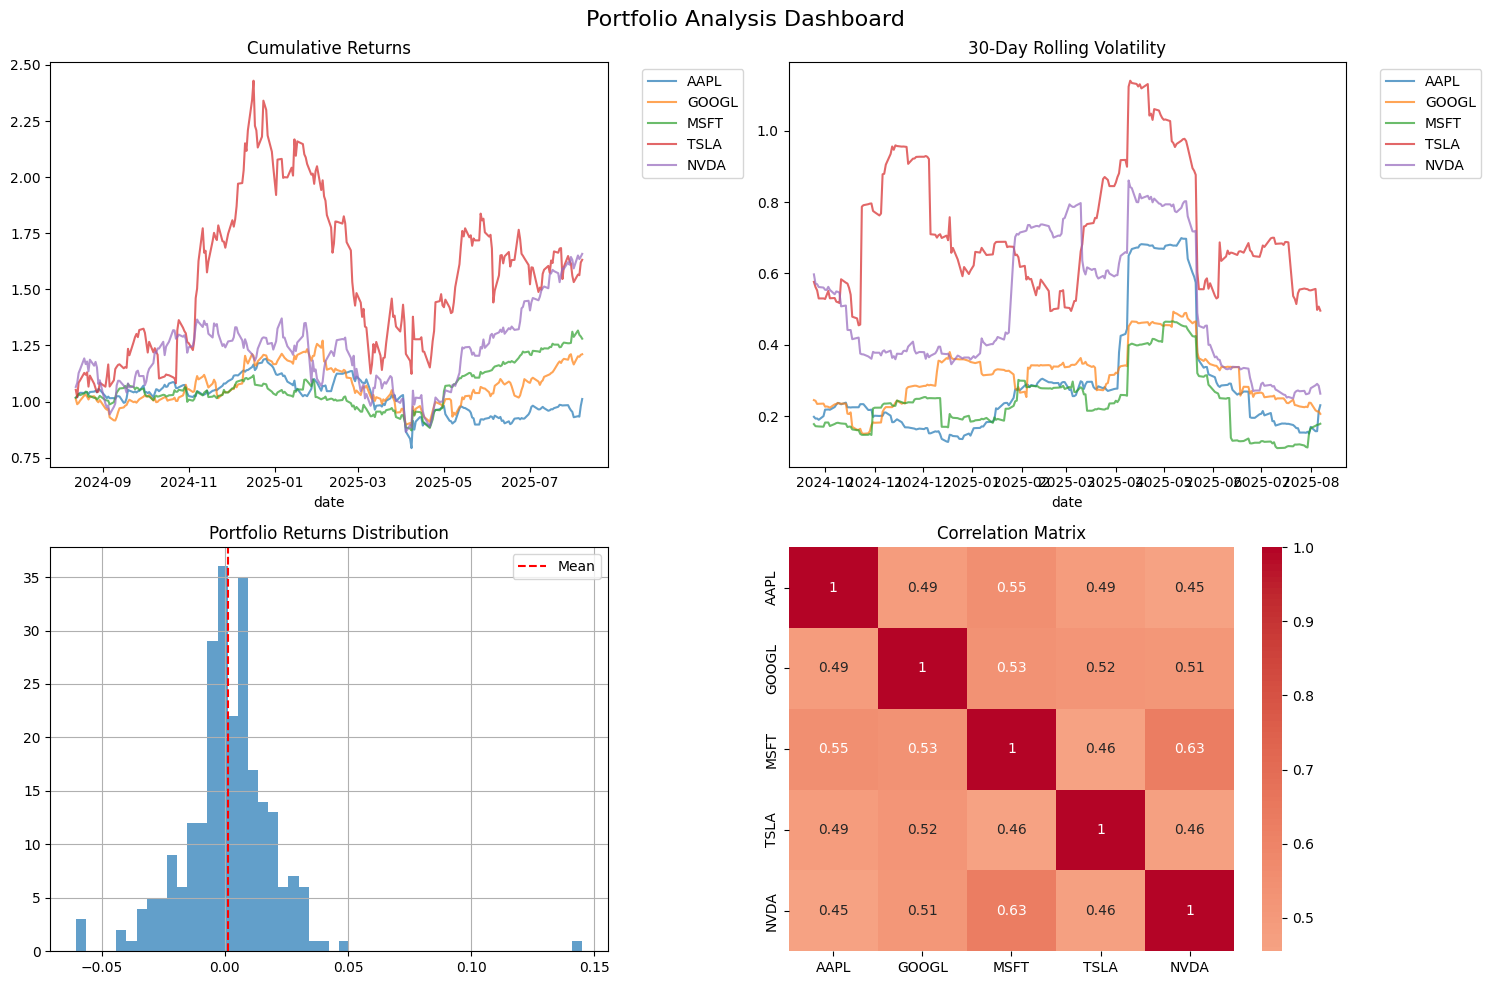


🎯 8. INVESTMENT SUMMARY & RECOMMENDATIONS
--------------------------------------------------
Portfolio Analysis Complete!
✅ Analyzed 5 stocks
✅ Calculated 3 sector performances
✅ Generated technical indicators and risk metrics
🏆 Best Performer: TSLA
📉 Worst Performer: AAPL

💡 Key Insights:
• Diversification across tech sectors reduces portfolio risk
• Technical indicators help identify entry/exit points
• Regular rebalancing maintains target allocations
• Monitor correlations to avoid concentration risk

🔧 Next Steps:
• Backtest different allocation strategies
• Add fundamental analysis metrics
• Implement automated alerts for technical signals
• Explore ESG and factor-based screening

OpenBB Advanced Tutorial Complete! 🎉
Visit https://openbb.co for more features and documentation


In [7]:
print("\n⚠️  6. RISK ANALYSIS")
print("-" * 50)

if not portfolio_returns.empty and len(portfolio_returns.columns) > 1:
    correlation_matrix = portfolio_returns.corr()
    print("\nPortfolio Correlation Matrix:")
    print(correlation_matrix.round(3))

    portfolio_var = np.dot(portfolio_weights, np.dot(correlation_matrix *
                          (portfolio_returns.std().values.reshape(-1,1) *
                           portfolio_returns.std().values.reshape(1,-1)),
                          portfolio_weights))
    portfolio_risk = np.sqrt(portfolio_var) * np.sqrt(252)
    print(f"\nPortfolio Risk (Volatility): {portfolio_risk:.2%}")

print("\n📊 7. CREATING PERFORMANCE VISUALIZATIONS")
print("-" * 50)

if not portfolio_returns.empty:
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Portfolio Analysis Dashboard', fontsize=16)

    cumulative_returns = (1 + portfolio_returns).cumprod()
    cumulative_returns.plot(ax=axes[0,0], title='Cumulative Returns', alpha=0.7)
    axes[0,0].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    rolling_vol = portfolio_returns.rolling(window=30).std() * np.sqrt(252)
    rolling_vol.plot(ax=axes[0,1], title='30-Day Rolling Volatility', alpha=0.7)
    axes[0,1].legend(bbox_to_anchor=(1.05, 1), loc='upper left')

    weighted_returns.hist(bins=50, ax=axes[1,0], alpha=0.7)
    axes[1,0].set_title('Portfolio Returns Distribution')
    axes[1,0].axvline(weighted_returns.mean(), color='red', linestyle='--', label='Mean')
    axes[1,0].legend()

    if len(correlation_matrix) > 1:
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=axes[1,1])
        axes[1,1].set_title('Correlation Matrix')

    plt.tight_layout()
    plt.show()

print("\n🎯 8. INVESTMENT SUMMARY & RECOMMENDATIONS")
print("-" * 50)

print("Portfolio Analysis Complete!")
print(f"✅ Analyzed {len(successful_stocks)} stocks")
print(f"✅ Calculated {len(sector_performance)} sector performances")
print(f"✅ Generated technical indicators and risk metrics")

if not portfolio_returns.empty and len(successful_stocks) > 0:
    best_performer = portfolio_returns.mean().idxmax()
    worst_performer = portfolio_returns.mean().idxmin()
    print(f"🏆 Best Performer: {best_performer}")
    print(f"📉 Worst Performer: {worst_performer}")

print("\n💡 Key Insights:")
print("• Diversification across tech sectors reduces portfolio risk")
print("• Technical indicators help identify entry/exit points")
print("• Regular rebalancing maintains target allocations")
print("• Monitor correlations to avoid concentration risk")

print("\n🔧 Next Steps:")
print("• Backtest different allocation strategies")
print("• Add fundamental analysis metrics")
print("• Implement automated alerts for technical signals")
print("• Explore ESG and factor-based screening")

print("\n" + "="*60)
print("OpenBB Advanced Tutorial Complete! 🎉")
print("Visit https://openbb.co for more features and documentation")